In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

2023-03-05 21:26:52.685900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 21:26:53.389830: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-05 21:26:53.390007: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-05 21:26:53.390016: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [19]:
IMG_SIZE = 64;
N_CHANNELS = 4;
ALPHA = 0.25;
batch_size = 32;

In [20]:
def fix_dims(image, label):
    return tf.transpose(image), label
def onehot(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

In [21]:
NUM_CLASSES = 10;
size = (IMG_SIZE,IMG_SIZE);

ds_train = tf.data.Dataset.load("latent_train")
ds_test = tf.data.Dataset.load("latent_test")

ds_train = ds_train.map(fix_dims, num_parallel_calls=8)
ds_train = ds_train.map(onehot, num_parallel_calls=8)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)

ds_test = ds_test.map(fix_dims, num_parallel_calls=8)
ds_test = ds_test.map(onehot, num_parallel_calls=8)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [22]:
MBNet = MobileNetV2(
    include_top=True,
    weights=None,
    alpha=ALPHA,
    classes=10,
    input_shape=(IMG_SIZE,IMG_SIZE,N_CHANNELS),
)
model = MBNet
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

/home/server/.local/lib/python3.10/site-packages/keras/applications/mobilenet_v2.py:299: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


In [23]:
print(model.layers[0].get_input_shape_at(0))
print(model.layers[-1].get_output_shape_at(0))
print(np.size(model.layers))

(None, 64, 64, 4)
(None, 10)
157


In [24]:
epochs = 20
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

Epoch 1/20
295/295 - 41s - loss: 2.3509 - accuracy: 0.1401 - val_loss: 2.3029 - val_accuracy: 0.1037 - 41s/epoch - 139ms/step
Epoch 2/20
295/295 - 15s - loss: 2.1038 - accuracy: 0.2477 - val_loss: 2.3073 - val_accuracy: 0.0989 - 15s/epoch - 50ms/step
Epoch 3/20
295/295 - 15s - loss: 1.9434 - accuracy: 0.3212 - val_loss: 2.3188 - val_accuracy: 0.0989 - 15s/epoch - 50ms/step
Epoch 4/20
295/295 - 15s - loss: 1.8312 - accuracy: 0.3662 - val_loss: 2.3352 - val_accuracy: 0.0989 - 15s/epoch - 49ms/step
Epoch 5/20
295/295 - 14s - loss: 1.7441 - accuracy: 0.4000 - val_loss: 2.3539 - val_accuracy: 0.0989 - 14s/epoch - 49ms/step
Epoch 6/20
295/295 - 14s - loss: 1.6689 - accuracy: 0.4247 - val_loss: 2.3795 - val_accuracy: 0.0989 - 14s/epoch - 49ms/step
Epoch 7/20
295/295 - 14s - loss: 1.6080 - accuracy: 0.4474 - val_loss: 2.3919 - val_accuracy: 0.0989 - 14s/epoch - 49ms/step
Epoch 8/20
295/295 - 15s - loss: 1.5457 - accuracy: 0.4746 - val_loss: 2.3802 - val_accuracy: 0.0989 - 15s/epoch - 50ms/step

Text(0, 0.5, 'Accuracy')

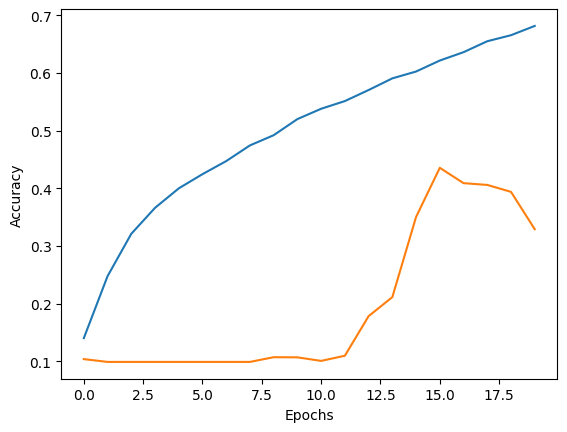

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [29]:
model.summary(layer_range=['input_2','input_2'])

Model: "mobilenetv2_0.25_64"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 4)]  0           []                               
                                                                                                  
Total params: 261,650
Trainable params: 250,994
Non-trainable params: 10,656
__________________________________________________________________________________________________
